# Проверка гипотез по увеличению выручки в интернет-магазине —оценить результаты A/B теста.

# Описание проекта
В нашем распоряжении данные о 9 гипотезах для увеличения выручки, подготовленных отделом маркетинга. Нам предстоит приоритизировать гипотезы, запустить A/B тест одной из гипотез и проанализировать результаты.

# Цель проекта

- Необходимость приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга;

- Анализа результатов проведенного А/В-тестирования и аргументация решения по результатам теста.

# Часть 1. Приоритизация гипотез.
Какие гипотезы наиболее важны для проверки, какие из них мы будем проверять в первую очередь?

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

# Часть 2. Анализ A/B-теста
Есть ли отличия между группами A и B? Есть ли смысл продолжать тестирование?

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализировать A/B-тест:

- Построить график кумулятивной выручки по группам.
- Построить график кумулятивного среднего чека по группам.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построить график кумулятивной конверсии по группам.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A.
- Построить точечный график количества заказов по пользователям.
- Посчитать 95-й и 99-й процентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов.
- Посчитать 95-й и 99-й процентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- Принять решение по результатам теста и объяснить его.

# Описание данных
Данные для первой части
Файл /datasets/hypothesis.csv.

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Изучение данных из файлов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from IPython.display import display
from scipy import stats as st

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Мы ознакомились с таблицами. На первый взгляд, пропусков нет, но нужны правки: тип данных в столбцах не всегда корректный (например, столбцы с датами имеют тип object). Так же нужно проверить данные на наличие дубликатов и привести наименования столбцов к единому стилю.

# Предобработка данных

In [ ]:
# приведем наименования столбцов к хорошему стилю
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [ ]:
print(f'Количество дубликатов в датасете hypothesis \n{hypothesis.isna().sum()}')

Количество дубликатов в датасете hypothesis 
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


In [ ]:
print(f'Количество дубликатов в датасете orders \n{orders.isna().sum()}')

Количество дубликатов в датасете orders 
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [ ]:
print(f'Количество дубликатов в датасете visitors \n{visitors.isna().sum()}')

Количество дубликатов в датасете visitors 
date        0
group       0
visitors    0
dtype: int64


In [ ]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

Сделали предобработку данных, идем дальше

## Часть 1. Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета и построим гистограмму.

In [ ]:
pd.set_option('max_colwidth', 200)
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values('ICE', ascending=False)


,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


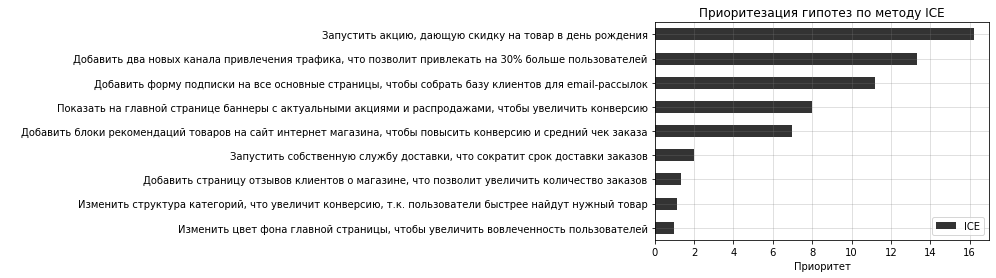

In [ ]:
ax = hypothesis[['hypothesis', 'ICE']].sort_values(by=['ICE']) \
                                      .set_index('hypothesis') \
                                      .plot(kind='barh', color='k', alpha = 0.8)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE')
plt.grid(b=True, color='grey', alpha=0.3)
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.show()

### А теперь применим фреймворк RICE для приоритизации гипотез.Отсортируем их по убыванию приоритета.

In [ ]:
hypothesis['RICE'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'], 2) / hypothesis['efforts']
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймворков - так различия в их работе максимально наглядны.
</div>

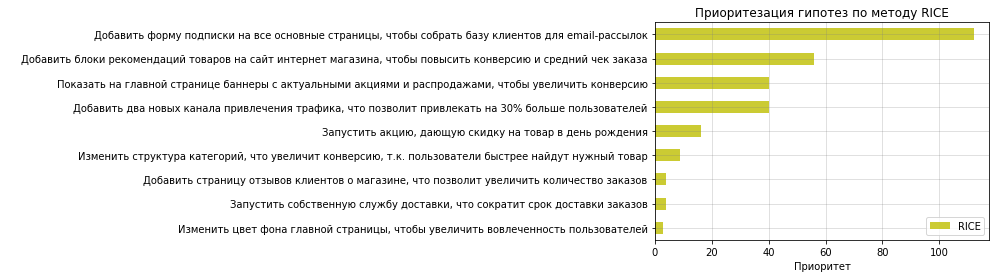

In [ ]:
ax = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE') \
                                      .set_index('hypothesis') \
                                      .plot(kind='barh', color='y', alpha = 0.8)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE')
plt.grid(b=True, color='grey', alpha=0.3)
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.show()

Вывод:
По фреймворку ICE наиболее приоритетными были гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

А по фреймворку RICE наиболее приоритетные гипотезы расположились следующим образом:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Разриличие между формулами:
- объясняется тем, что в случае фреймворка ICE в отличие от RICE мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез.

Mы предполагаем, что блоки рекомендаций увидит очень большая доля пользователей, гипотеза 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" поднимается с пятого места до второго.

## Часть 2. Анализ A/B-теста

Первым делом проверим, нет ли пользователей, попавших одновременно в обе группы.

In [ ]:
g_a = orders[orders['group'] == 'A']['visitorId']
g_b = orders[orders['group'] == 'B']['visitorId']
orders_ab = orders.query('visitorId in @g_a and visitorId in @g_b')
display(orders_ab['visitorId'].unique())
print('Количество пользователей в двух группах:', orders_ab['visitorId'].nunique())
print('Всего пользователей в тесте:', orders['visitorId'].nunique())


array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031


###  Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

 Сгруппируем таблицу orders по дате и группе A/B-теста и посчитаем количество уникальных заказов, покупателей и суммарную выручку.

In [ ]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]. \
                                     agg({'date' : 'max',
                                          'group' : 'max',
                                          'transactionId' : pd.Series.nunique,
                                          'visitorId' : pd.Series.nunique,
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max',
                                            'group' : 'max',
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [ ]:
#проверим есть ли различия в новом и старом датафрейме
if cumulativeData['date'].min() != orders['date'].min() and cumulativeData['date'].max() != orders['date'].max():
    raise Exception('Даты в датафреймах разные')

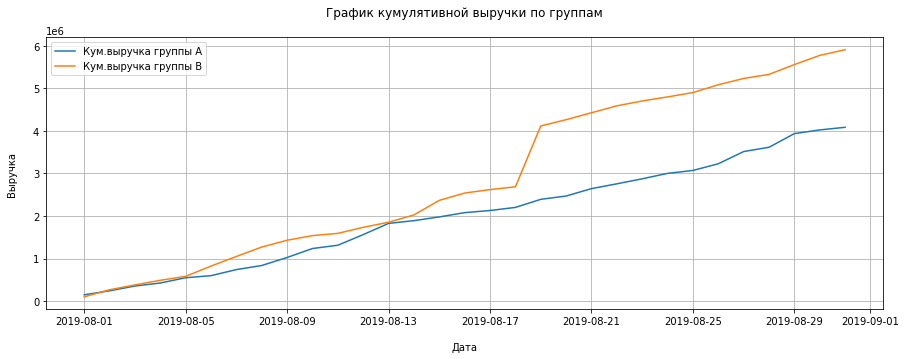

In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
#Строим график
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
#Строим график
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.title('График кумулятивной выручки по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')
plt.grid()
plt.legend();


 Выручка в обеих группах увеличивается на протяжении всего теста. Однако в группе B есть резкий всплеск, который может свидетельствовать о всплеске числа заказов или о появлении неожидано дорогих заказов.

### Построим график кумулятивного среднего чека по группам.

Чтобы построить графики среднего кумулятивного чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

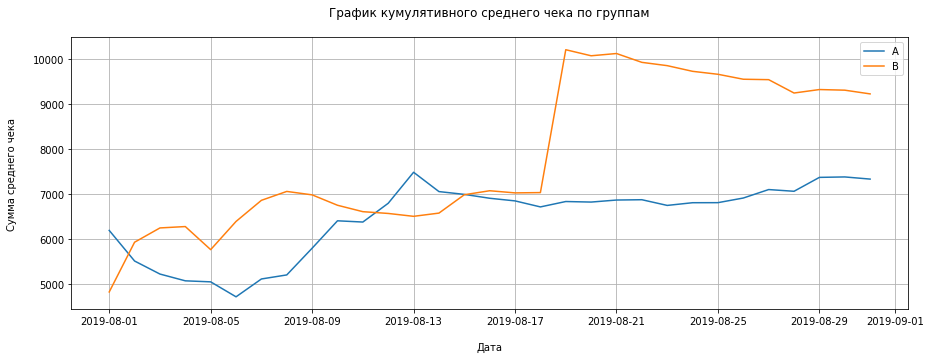

In [ ]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Сумма среднего чека\n')
plt.legend();

Средний чек заказов группы A вначале проседает, потом быстро растёт со всплеском 13 августа, затем стабилизируется. Средний чек группы B растёт скачкообразно (всплеск 19-го августа на месте), затем медленно падает.

Ком.значение среднего чека по сегментам нестабильно. Возможно имеются аномальные значения (выбросы), которые искажают общую картину.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Построим график относительного изменения кумулятивного среднего чека.

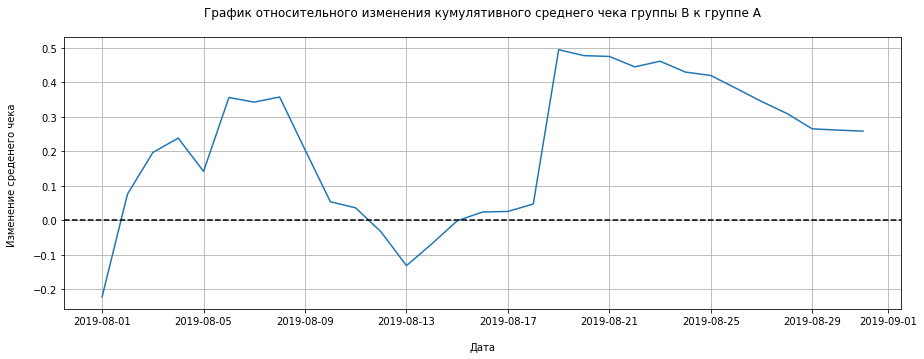

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',
                                                   how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']
                                           /mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Изменение среденего чека \n')

plt.axhline(y=0, color='black', linestyle='--');

Глядя на график относительного различия в среднем чеке между группами, видим как сильно меняются значения в определенные даты. Веротяно, тогда и были совершены аномальные заказы.

Резкие различия в кумулятивном среднем чеке наблюдаются 4-го, 6-го и 8-го, 19-го августа.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам.

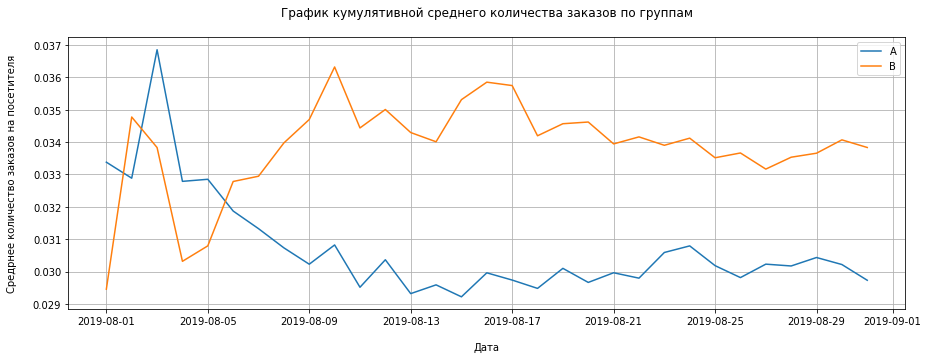

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной среднего количества заказов по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Средрнее количество заказов на посетителя\n');


Графики кумулятивной среднего количества заказов неплавные, есть выбросы.

Сначала сегмент А имел большую кумулятивной среднего количества заказов, но чуть позже сегмент В выровнялся и зафиксировался больше значения сегмента А.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Построим график относительного различия

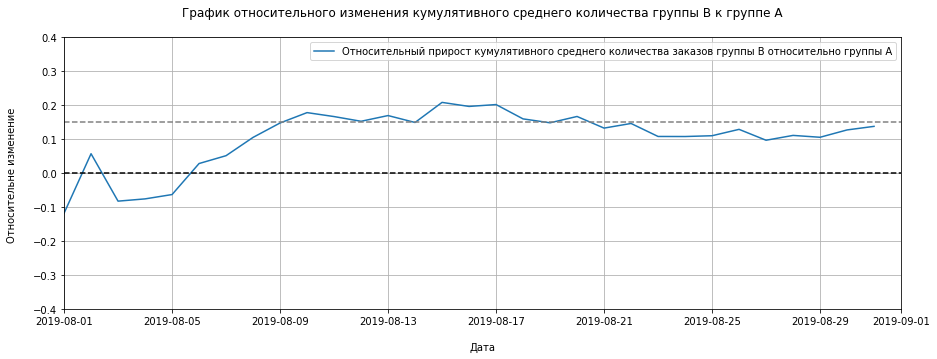

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date',
                                                                           right_on='date',
                                                                           how='left',
                                                                           suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост кумулятивного среднего количества заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.4, 0.4])
plt.title('График относительного изменения кумулятивного среднего количества группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Относительне изменение \n');

В начале теста группа B просела относительно группы A, затем резко выросла и стабилизировалась.
Сначала количество заказов на посетителя колебались, но довольно быстро выровнялись; результат группы В кажется более привлекательным.

### Построим точечный график количества заказов по пользователям.

In [ ]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
ordersByUsers.head(10)

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
5,47206413,1
6,48147722,1
7,54447517,1
8,56960363,1
9,66685450,1


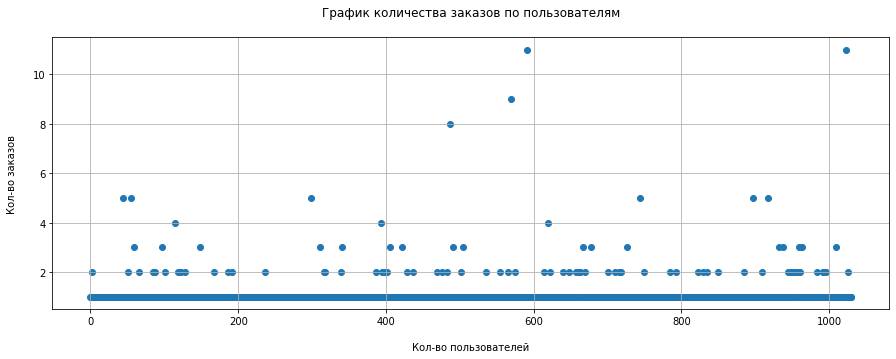

In [ ]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)


plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Кол-во заказов\n')
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Больше всего пользователей совершивших 1 заказ.
Совершивших 2 заказа значительно меньше. Совершивших 3 заказа единицы, возможно они будут являться выбросами

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

Определим 95 и 99 перцентили количества заказов на одного пользователя методом percentile()

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

95% пользователей овершают не больше 1 заказа, 99% совершают 2 заказа, аномальным будет всё, что и более этого.

### Постройте точечный график стоимостей заказов.

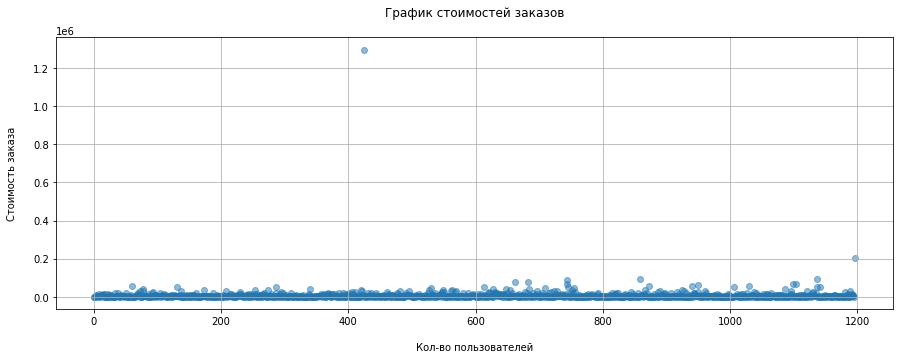

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов\n ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

График не очень нагляный из-за наличия двух аномальных значений.
Посмотрим поближе, для это уберем очевидные выбросы с 'revenue' большим 200000

In [ ]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Один аномальный заказ на сумму 1294500

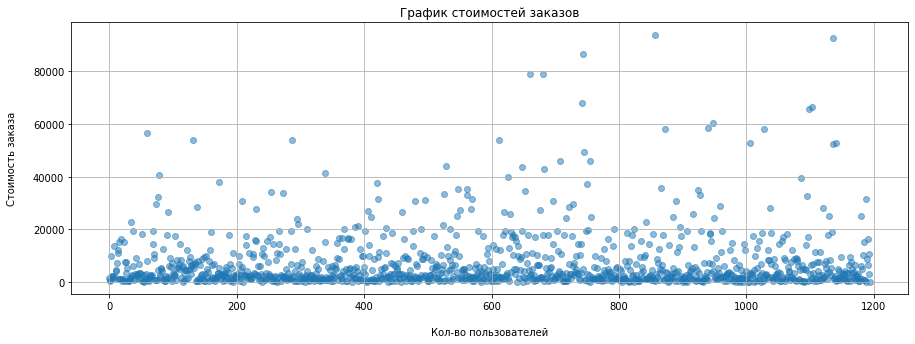

In [ ]:
norm_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')

plt.scatter(xn_values, norm_orders, alpha=0.5);

Разброс стоимостей заказов значительный, определить границу аномальных заказов затруднительно.
Большая часть всех заказов не дороже 20000. Более точное распределение посмотрим с помощью перцентилей.

### Посчитайте 95-й и 99-й перцентили стоимости заказов.
Выберите границу для определения аномальных заказов.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более чем у 95% заказов чек выше 26785 рублей, и не более чем у 1% дороже 53904 рублей.
За границу для определения аномальных заказов примем значение 53904.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Ранее мы результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы. Потом увидели выбросы и нашли границу для их определения.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей.

Введем основную и альтернативные гипотезы:

H0:Статистически значимых различий в среднем количестве заказов на посетителя между группами по сырым данным нет.

H1:Статистически значимых различий в среднем количестве заказов на посетителя между группами по сырым данным есть.

Уровень значимости: α=0.05


In [ ]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

#visitors_cummulative_a = visitors_daily_a.apply(
#    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
#        {'date': 'max', 'visitors_per_date_a': 'sum'}
#    ),
#    axis=1,
#)
#visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

#visitors_cummulative_b = visitors_daily_b.apply(
#    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
#        {'date': 'max', 'visitors_per_date_b': 'sum'}
#    ),
#    axis=1,
#)
#visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

#orders_cummulative_a = orders_daily_a.apply(
#    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
#        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
#    ),
#    axis=1,
#).sort_values(by=['date'])

#orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

#orders_cummulative_b = orders_daily_b.apply(
#    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
#        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
#    ),
#    axis=1,
#).sort_values(by=['date'])

#orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )

    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')

)

data.head(6)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,visitors_per_date_a,visitors_per_date_b
0,2019-08-01,24,148579,21,101217,719,713
1,2019-08-02,20,93822,24,165531,619,581
2,2019-08-03,24,112473,16,114248,507,509
3,2019-08-04,16,70825,17,108571,717,770
4,2019-08-05,25,124218,23,92428,756,707
5,2019-08-06,18,48484,28,242342,667,655


Итак, у нас получилась следующая таблица.

- date — дата;
- orders_daily_a — количество заказов в выбранную дату в группе A;
- revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
- orders_daily_a — количество заказов в выбранную дату в группе B;
- revenue_per_date_a — суммарная выручка в выбранную дату в группе B;
- visitors_per_date_a — количество пользователей в выбранную дату в группе A;
- visitors_per_date_b — количество пользователей в выбранную дату в группе B;


Создадим переменные orders_by_users_a и orders_by_users_b; в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [ ]:
sample_a = pd.concat([ordersByUsersA['orders'],
                      pd.Series(
                          0,
                          index=np.arange(data['visitors_per_date_a'].sum() -
                                          len(ordersByUsersA['orders'])),
                          name='orders')],axis=0
                    )

sample_b = pd.concat([ordersByUsersB['orders'],
                      pd.Series(
                          0,
                          index=np.arange(data['visitors_per_date_b'].sum() -
                                          len(ordersByUsersB['orders'])),
                          name='orders')],axis=0
                    )

Задаем функцию, в которой:

задаем уровень значимости alpha=0.05,
применим критерий Манна-Уитни,
отформатируем p-value, округлив его до трёх знаков после запятой,
выведем относительный прирост среднего количества заказов на посетителя группы B: среднее группы B / среднее группы A - 1, округлив до трёх знаков после запятой

In [ ]:
# Функция для проверки гипотезы о равенстве групп data A и data B
def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = st.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")

    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))


In [ ]:
stat_significance(sample_a, sample_b)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


По неочищенным данным различия в среднем количестве заказов на посетителя между группами есть.
P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в в среднем количестве заказов на посетителя между группами нет, отвергаем.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами.

Введем основную и альтернативные гипотезы:

H0:различий в среднем чеке между группами нет

H1:различия в среднем чеке между группами есть

Уровень значимости: α=0.05

In [ ]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])


P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


По «сырым» данным P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами.

Введем основную и альтернативные гипотезы:

H0:среднее количество заказов групп A и B по «очищенным» данным совпадают

H1:среднее количество заказов групп A и B по «очищенным» данным различаются

Уровень значимости: α=0.05

In [ ]:
many_orders = np.percentile(ordersByUsers['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > many_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > many_orders]['visitorId'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitorId']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64

15

Всего 15 аномальных пользователей. Не так уж и много. Посмотрим, как изменятся расчеты без их участия.

In [ ]:
# Рассчитаем относительные потери
abnormal_users.shape[0] / orders.visitorId.nunique()


0.014548981571290009

In [ ]:
sample_a_filtered = pd.concat(
    [ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
stat_significance(sample_a_filtered, sample_b_filtered)

P-value: 0.018
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 14.827%


На очищенных данных разница в среднем количестве заказов на посетителя между группами есть, а относительный прирост среднего группы В отнистельно группы А.
 нулевую гипотезу о том, что конверсии групп A и B по «очищенным» данным совпадают, - отвергаем. Это значит: и по «очищенным» данным в конверсии групп A и B есть статистически значимые различия.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Введем основную и альтернативные гипотезы:

H0:статистически значимых различий в средних чеках между группами нет

H1:статистически значимые различия есть.

Подсчитаем статистическую значимость различий в среднем чеке после удаления аномальных пользователей.

In [ ]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitorId'].isin(abnormal_users))]['revenue'],
    orders[(orders['group']=='B') & np.logical_not(orders['visitorId'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет.

### Примите решение по результатам теста и объясните его

Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

1. В части приоритизации гипотез из списка, предоставленных отделом Маркетинга следует в первую очередь обратить внимание на гипотезы:

- "Запустить акцию, дающую скидку на товар в день рождения",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина, то места необходимо распределить таким образом:

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить средний чек заказа",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
2. В части анализа А/В теста:

Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по «сырым», так и по данным после фильтрации аномалий. Среднее группы В выше, чем в A.

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом средний чек группы В выше.

График относительного изменения кумулятивной среднего количества заказов группы B к группе A показывает, что результаты группы В стабильно лучше группы А.

На основании вышеизложенного рекомендуем остановить тест, зафиксировав победу группы B (ее среднее значительно выше среднего группы А).